In [1]:
from bs4 import BeautifulSoup

from urllib.request import urlopen

page = urlopen('https://music.bugs.co.kr/chart')

soup = BeautifulSoup(page, 'html.parser')

print(soup.prettify())

<!DOCTYPE html>
<html lang="ko">
 <head>
  <!-- bgsweb-www905.svr.toastmaker.net -->
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="음악,음악 스트리밍,최신음악,인기가요,뮤직비디오,앨범,플레이어,mp3 다운로드" name="keywords">
   <meta content="벅스 2천만곡 음악서비스, 슈퍼사운드, 고음질, FLAC, 최신 인기가요, 복면가왕 무료보기, 페이코" name="description">
    <!-- bgsweb-www905.svr.toastmaker.net -->
    <script type="text/javascript">
     if(!(location.href.indexOf("music.bugs.co.kr/newPlayer") >= 0 || location.href.indexOf("music.bugs.co.kr/newRadio") >= 0 || location.href.indexOf("localhost") >= 0))
		document.domain = 'bugs.co.kr';

	var g_urlBase = "https://www.bugs.co.kr";
	var g_urlWww = "https://www.bugs.co.kr";
	var g_urlSecure = "https://secure.bugs.co.kr";
	var g_urlMusic = "https://music.bugs.co.kr";
	var g_urlMusicSecure = "https://music.bugs.co.kr";
	var g_urlMember = "https://secure.bugs.co.kr/member";
	var g_urlFile = "https://file.bugsm.co.kr/wbugs";
	var g_urlFile_n ="https://file.

In [2]:
all_song = soup.find(class_ = 'list trackList byChart').tbody.find_all('tr')
all_song

[<tr albumid="20153146" artistid="80020023" multiartist="N" mvid="0" rowtype="track" trackid="30984692">
 <input name="_isStream" type="hidden" value="30984692">
 <input name="_isDown" type="hidden" value="30984692">
 <td class="check"><input disc_id="1" name="check" title="꽃 길" type="checkbox" value="30984692"/></td>
 <td>
 <div class="ranking">
 <strong>1</strong>
 <p class="change none"><em>0</em><span>변동없음</span></p>
 </div>
 </td>
 <td>
 <a class="thumbnail" href="https://music.bugs.co.kr/album/20153146?wl_ref=list_tr_07_chart" onclick="
 ">
 <span class="mask"></span>
 <img alt="꽃 길 대표이미지" onerror="bugs.utils.imgError(this);" src="https://image.bugsm.co.kr/album/images/50/201531/20153146.jpg?version=20180314002356"/>
 </a>
 </td>
 <td>
 <a class="trackInfo" href="https://music.bugs.co.kr/track/30984692?wl_ref=list_tr_08_chart" onclick="
 ">곡정보</a>
 </td>
 <th scope="row">
 <p adult_yn="N" class="title">
 <a adultcheckval="1" aria-label="새창" href="javascript:;" onclick="bugs.wisel

In [3]:
import re

bugs=[]

for song in all_song:
    rank = int(song.find('strong').get_text())
    updown = song.find('p', class_='change').get_text()
    title = song.find('th', scope='row').get_text().strip()
    singer = ' '.join(list(set(re.split('\r\n|\n',song.find('p', class_='artist').get_text().strip())))).strip()
    album = song.find('a', class_='album').get_text()
    
    if '없음' in updown:
        updown = updown.replace("변동없음","")
    elif '상승'in updown:
        updown = updown.replace("계단 상승", "")
    elif '하락' in updown:
        updown = updown.replace("계단 하락", "")
    else:
        updown = 0
       
    
    #앨범 발매일
    album_page = song.find('a')['href']
    page_open= urlopen(album_page)
    album_pg = BeautifulSoup(page_open, 'html.parser')
    #dates = album_pg.find(class_='info').tbody.find_all('tr')[2]
    
#     if  : # dates(find_all 한 결과의 2번째 요소)가 숫자(날짜)가 아니면 for 검사 -->
#         print("!")
        
#     for date in dates:
#         r_date_text = date.find_all('th')[0]
        
#         if r_date_text.text == '발매일':
#             r_date = r_date_text.next_sibling.next_sibling.time.text
        
#    r_date = dates.time.text

    r_date = album_pg.find('tbody').find('time').text
    
    bugs.append([rank, int(updown), title, singer, album, r_date])
        
    print('순위 :', rank)
    print('등락 :', updown)
    print('곡 :', title)
    print('가수 :', singer)
    print('앨범 :', album)
    print('발매일 :', r_date)
    print()

순위 : 1
등락 : 0
곡 : 꽃 길
가수 : BIGBANG
앨범 : 꽃 길
발매일 : 2018.03.13

순위 : 2
등락 : 0
곡 : 나타나줘 (Feat. 박재범)
가수 : 로꼬
앨범 : 나타나줘
발매일 : 2018.03.14

순위 : 3
등락 : 0
곡 : 별이 빛나는 밤
가수 : 마마무(Mamamoo)
앨범 : Yellow Flower
발매일 : 2018.03.07

순위 : 4
등락 : 0
곡 : Jenga (Feat. Gaeko)
가수 : 헤이즈(HEIZE)
앨범 : 바람
발매일 : 2018.03.08

순위 : 5
등락 : 0
곡 : My Blossom
가수 : 소유 (SOYOU)
앨범 : My Blossom
발매일 : 2018.03.12

순위 : 6
등락 : 0
곡 : You
가수 : 멜로망스(MeloMance)
앨범 : 투유 프로젝트 - 슈가맨2 Part.2
발매일 : 2018.01.22

순위 : 7
등락 : 0
곡 : 내가 더 나빠
가수 : 헤이즈(HEIZE)
앨범 : 바람
발매일 : 2018.03.08

순위 : 8
등락 :  1 
곡 : 그때 헤어지면 돼
가수 : 로이킴
앨범 : 그때 헤어지면 돼
발매일 : 2018.02.12

순위 : 9
등락 :  1 
곡 : 사랑을 했다 (LOVE SCENARIO)
가수 : iKON
앨범 : Return
발매일 : 2018.01.25

순위 : 10
등락 : 0
곡 : 그날처럼
가수 : 장덕철
앨범 : 그날처럼
발매일 : 2017.11.28

순위 : 11
등락 :  1 
곡 : 뿜뿜
가수 : 모모랜드(MOMOLAND)
앨범 : GREAT!
발매일 : 2018.01.03

순위 : 12
등락 :  1 
곡 : 괜찮냐고
가수 : 헤이즈(HEIZE)
앨범 : 바람
발매일 : 2018.03.08

순위 : 13
등락 : 0
곡 : BOSS
가수 : NCT U
앨범 : NCT 2018 EMPATHY
발매일 : 2018.03.14

순위 : 14
등락 : 0
곡 : 눈사람
가수 : 정승환
앨범 : 

순위 : 99
등락 :  5 
곡 : Blue
가수 : 볼빨간사춘기
앨범 : Red Diary Page.1
발매일 : 2017.09.28

순위 : 100
등락 :  1 
곡 : HOLIDAY (Feat. DPR LIVE)
가수 : 수지(SUZY)
앨범 : Faces of Love
발매일 : 2018.01.29



In [4]:
bugs

[[1, 0, '꽃 길', 'BIGBANG', '꽃 길', '2018.03.13'],
 [2, 0, '나타나줘 (Feat. 박재범)', '로꼬', '나타나줘', '2018.03.14'],
 [3, 0, '별이 빛나는 밤', '마마무(Mamamoo)', 'Yellow Flower', '2018.03.07'],
 [4, 0, 'Jenga (Feat. Gaeko)', '헤이즈(HEIZE)', '바람', '2018.03.08'],
 [5, 0, 'My Blossom', '소유 (SOYOU)', 'My Blossom', '2018.03.12'],
 [6, 0, 'You', '멜로망스(MeloMance)', '투유 프로젝트 - 슈가맨2 Part.2', '2018.01.22'],
 [7, 0, '내가 더 나빠', '헤이즈(HEIZE)', '바람', '2018.03.08'],
 [8, 1, '그때 헤어지면 돼', '로이킴', '그때 헤어지면 돼', '2018.02.12'],
 [9, 1, '사랑을 했다 (LOVE SCENARIO)', 'iKON', 'Return', '2018.01.25'],
 [10, 0, '그날처럼', '장덕철', '그날처럼', '2017.11.28'],
 [11, 1, '뿜뿜', '모모랜드(MOMOLAND)', 'GREAT!', '2018.01.03'],
 [12, 1, '괜찮냐고', '헤이즈(HEIZE)', '바람', '2018.03.08'],
 [13, 0, 'BOSS', 'NCT U', 'NCT 2018 EMPATHY', '2018.03.14'],
 [14, 0, '눈사람', '정승환', '그리고 봄', '2018.02.19'],
 [15,
  0,
  'Bad Boy',
  'Red Velvet (레드벨벳)',
  'The Perfect Red Velvet - The 2nd Album Repackage',
  '2018.01.29'],
 [16, 0, 'Roller Coaster', '청하', 'Offset', '2018.01.17'],
 [17

In [5]:
import pandas as pd

df = pd.DataFrame(bugs, columns=['순위','등락','곡','가수','앨범','발매일'])
df

,순위,등락,곡,가수,앨범,발매일
0,1,0,꽃 길,BIGBANG,꽃 길,2018.03.13
1,2,0,나타나줘 (Feat. 박재범),로꼬,나타나줘,2018.03.14
2,3,0,별이 빛나는 밤,마마무(Mamamoo),Yellow Flower,2018.03.07
3,4,0,Jenga (Feat. Gaeko),헤이즈(HEIZE),바람,2018.03.08
4,5,0,My Blossom,소유 (SOYOU),My Blossom,2018.03.12
5,6,0,You,멜로망스(MeloMance),투유 프로젝트 - 슈가맨2 Part.2,2018.01.22
6,7,0,내가 더 나빠,헤이즈(HEIZE),바람,2018.03.08
7,8,1,그때 헤어지면 돼,로이킴,그때 헤어지면 돼,2018.02.12
8,9,1,사랑을 했다 (LOVE SCENARIO),iKON,Return,2018.01.25
9,10,0,그날처럼,장덕철,그날처럼,2017.11.28


In [6]:
import numpy as np
import platform

from matplotlib import font_manager,rc
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['axes.unicode_minus']=False

if platform.system()=='Darwin':
    rc('font',family='AppleGothic')
elif platform.system()=='Windows':
    path="c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family=font_name)

else:
    print('Unknown System... Sorry~~')

In [7]:
np.corrcoef(df['순위'], df['등락'])

array([[1.        , 0.46036567],
       [0.46036567, 1.        ]])

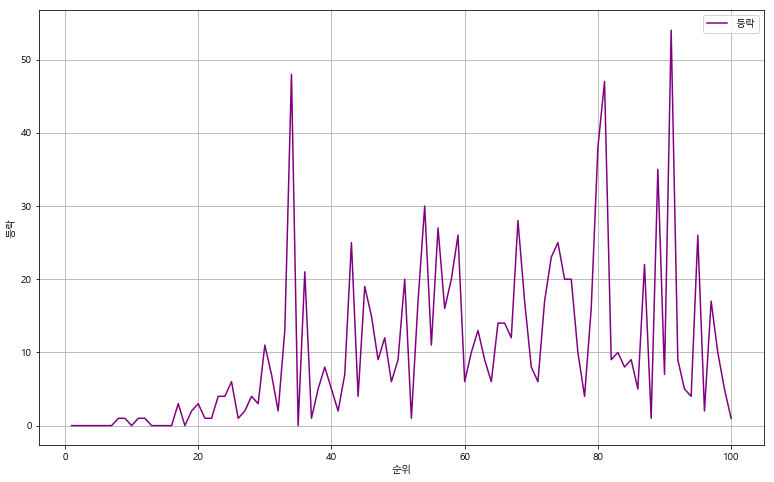

In [8]:
plt.figure(figsize=(13,8))
plt.plot(df['순위'], df['등락'], color='purple', markersize=12)
plt.grid()
plt.legend(loc='best')
plt.xlabel('순위')
plt.ylabel('등락')
plt.show()

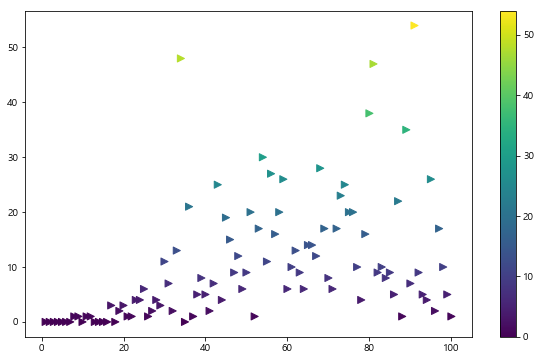

In [9]:
colormap = df['등락']

plt.figure(figsize=(10,6))
plt.scatter(df['순위'], df['등락'], s=50, c=colormap, marker='>')
plt.colorbar()
plt.show()